# What's in the notebook?

## 1. Data Cleaning & Data Preparation
   - ##### Pandas Data Frame
   - ##### Slicing out relevant columns
   - ##### Looking for unphysical records/rows
   - ##### Creating training, validation and test splits
   - ##### Converting data into numpy arrays
   - ##### Feature Scaling

## 2. Data Visualisation
 - #### Principal Component Analysis
   - ##### Intercative 3d scatter plot

## 3. Data Classification
 - ### Unsupervised Learning
   - ##### Gaussian Mixture Model Clustering

 - ### Supervised Learning
   - ##### Neural Network
   - ##### XGBoost
   - ##### Random Forest 

## 4. Model Ensembling

## 5. Summarizing the Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers, callbacks
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

import helping_functions as hp

from itertools import permutations

import plotly.express as px

from sklearn.mixture import GaussianMixture


### Stellar Classification Dataset - SDSS17
### Classification of Stars, Galaxies and Quasars. Sloan Digital Sky Survey DR17

#### **Context**


**This dataset aims to classify stars, galaxies, and quasars based on their spectral characteristics.**

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

| Feature Name   | Description                                                                                                       |
|---------------|-------------------------------------------------------------------------------------------------------------------|
| obj_ID        | Object Identifier, the unique value that identifies the object in the image catalog used by the CAS             |
| alpha         | Right Ascension angle (at J2000 epoch)                                                                          |
| delta         | Declination angle (at J2000 epoch)                                                                             |
| u             | Ultraviolet filter in the photometric system                                                                   |
| g             | Green filter in the photometric system                                                                        |
| r             | Red filter in the photometric system                                                                          |
| i             | Near Infrared filter in the photometric system                                                                |
| z             | Infrared filter in the photometric system                                                                     |
| run_ID        | Run Number used to identify the specific scan                                                                 |
| rereun_ID     | Rerun Number to specify how the image was processed                                                            |
| cam_col       | Camera column to identify the scanline within the run                                                         |
| field_ID      | Field number to identify each field                                                                           |
| spec_obj_ID   | Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class) |
| class         | Object class (galaxy, star, or quasar object)                                                                 |
| redshift      | Redshift value based on the increase in wavelength                                                            |
| plate         | Plate ID, identifies each plate in SDSS                                                                        |
| MJD           | Modified Julian Date, used to indicate when a given piece of SDSS data was taken                               |
| fiber_ID      | Fiber ID that identifies the fiber that pointed the light at the focal plane in each observation              |

#### **Citation**

[fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17.](https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17)

#### **Acknowledgements**

The data released by the SDSS is under public domain. Its taken from the current data release RD17
[More information about the license](http://www.sdss.org/science/image-gallery/)

#### **SDSS Publications**

The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. submitted to ApJS) [arXiv:2112.02026](https://arxiv.org/abs/2112.02026)


### [Click Here for more details & to download the dataset](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)


#### Loading & Exploring The Data


In [2]:
data_frame = pd.read_csv('dataset/star_classification.csv')


In [3]:
data_frame.head()


obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

#### Removing unwanted Columns


In [4]:
columns_list = data_frame.columns
columns_list


Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [5]:
columns_to_be_dropped = ['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
data_frame.drop(columns = columns_to_be_dropped, inplace = True)


In [6]:
data_frame.head()


u         g         r         i         z   class  redshift
0  23.87882  22.27530  20.39501  19.16573  18.79371  GALAXY  0.634794
1  24.77759  22.83188  22.58444  21.16812  21.61427  GALAXY  0.779136
2  25.26307  22.66389  20.60976  19.34857  18.94827  GALAXY  0.644195
3  22.13682  23.77656  21.61162  20.50454  19.25010  GALAXY  0.932346
4  19.43718  17.58028  16.49747  15.97711  15.54461  GALAXY  0.116123

#### Looking for NULL values

In [7]:
# checking if there are any 'NULL' records/rows in the dataframe
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   u         100000 non-null  float64
 1   g         100000 non-null  float64
 2   r         100000 non-null  float64
 3   i         100000 non-null  float64
 4   z         100000 non-null  float64
 5   class     100000 non-null  object 
 6   redshift  100000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.3+ MB


#### Looking for unphysical values


In [85]:
# looking for unreal/bad/unphysical values

# if we don't remove them, we'll face problems in data visualization
data_frame.describe()


u             g             r             i             z  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean      22.080679     20.631583     19.645777     19.084865     18.768988   
std        2.251068      2.037384      1.854763      1.757900      1.765982   
min       10.996230     10.498200      9.822070      9.469903      9.612333   
25%       20.352410     18.965240     18.135795     17.732280     17.460830   
50%       22.179140     21.099930     20.125310     19.405150     19.004600   
75%       23.687480     22.123775     21.044790     20.396510     19.921120   
max       32.781390     31.602240     29.571860     32.141470     29.383740   

           redshift  
count  99999.000000  
mean       0.576667  
std        0.730709  
min       -0.009971  
25%        0.054522  
50%        0.424176  
75%        0.704172  
max        7.011245

In [9]:
# we see that the value of -9999 is clearly an unreal value

# the index corresponding to this unreal value
min_index = data_frame['u'].idxmin()
min_index


79543

In [10]:
# Removing the row which contains the unreal
data_frame.drop(min_index, inplace= True)


In [11]:
# checking if there are anymore unreal values
data_frame.describe()


u             g             r             i             z  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean      22.080679     20.631583     19.645777     19.084865     18.768988   
std        2.251068      2.037384      1.854763      1.757900      1.765982   
min       10.996230     10.498200      9.822070      9.469903      9.612333   
25%       20.352410     18.965240     18.135795     17.732280     17.460830   
50%       22.179140     21.099930     20.125310     19.405150     19.004600   
75%       23.687480     22.123775     21.044790     20.396510     19.921120   
max       32.781390     31.602240     29.571860     32.141470     29.383740   

           redshift  
count  99999.000000  
mean       0.576667  
std        0.730709  
min       -0.009971  
25%        0.054522  
50%        0.424176  
75%        0.704172  
max        7.011245

#### Grouping the rows/records based on their class

In [12]:
# printing the number of samples for each class
data_frame['class'].value_counts()


class
GALAXY    59445
STAR      21593
QSO       18961
Name: count, dtype: int64

In [13]:
# grouping the records/rows based on their class
grouped = data_frame.groupby('class')


In [14]:
# Extracting the records corresponding to each class into separate sub-dataframes
# df: 'd'ata 'f'rame

df_corresponding_to_quasars   =  grouped.get_group('QSO')
df_corresponding_to_galaxies  =  grouped.get_group('GALAXY')
df_corresponding_to_stars     =  grouped.get_group('STAR')


**Downsampling the sub dataframes corresponding to the classes 'GALAXY' and 'STAR', so that they have the same number of samples as the sub dataframe corresponding to the class 'QSO'. Removing class imbalance leads to a better trained the neural network.**

Note that the downsampling is random i.e. The records to be included in the new dataset are selected randomly.


In [15]:
desired_sample_size = len(df_corresponding_to_quasars)

df_corresponding_to_galaxies  =  df_corresponding_to_galaxies.sample(n = desired_sample_size)
df_corresponding_to_stars     =  df_corresponding_to_stars.sample(n    = desired_sample_size)


In [16]:
print('Length of dataframe corresponding to the class QSO is:    ',len(df_corresponding_to_quasars))
print('Length of dataframe corresponding to the class Galaxy is: ',len(df_corresponding_to_galaxies))
print('Length of dataframe corresponding to the class QSO is:    ',len(df_corresponding_to_stars))


Length of dataframe corresponding to the class QSO is:     18961
Length of dataframe corresponding to the class Galaxy is:  18961
Length of dataframe corresponding to the class QSO is:     18961


#### Quasars Data

In [17]:
df_corresponding_to_quasars.describe()


u             g             r             i             z  \
count  18961.000000  18961.000000  18961.000000  18961.000000  18961.000000   
mean      21.547619     20.926193     20.624089     20.431173     20.266732   
std        1.495879      1.163239      1.084237      1.080135      1.095076   
min       10.996230     13.662170     12.357630     12.637440     11.302470   
25%       20.637640     20.249730     20.006330     19.811070     19.644250   
50%       21.503240     21.056290     20.772720     20.582110     20.373970   
75%       22.286470     21.687770     21.413450     21.202280     21.001230   
max       32.781390     27.894820     27.397090     32.141470     28.790550   

           redshift  
count  18961.000000  
mean       1.719676  
std        0.913954  
min        0.000461  
25%        1.106605  
50%        1.617232  
75%        2.220279  
max        7.011245

#### Galaxies Data

In [18]:
df_corresponding_to_galaxies.describe()


u             g             r             i             z  \
count  18961.000000  18961.000000  18961.000000  18961.000000  18961.000000   
mean      22.583785     20.890516     19.572878     18.841699     18.439426   
std        2.277694      2.115090      1.881130      1.699810      1.663599   
min       13.897990     12.679020     11.746640     11.299560     10.918470   
25%       20.759380     18.882450     17.805800     17.368620     17.082980   
50%       22.844640     21.567920     20.080210     19.212450     18.757530   
75%       24.224910     22.435310     20.956490     19.936780     19.470270   
max       28.618680     27.388510     27.626880     29.889210     28.238290   

           redshift  
count  18961.000000  
mean       0.420170  
std        0.265323  
min       -0.006863  
25%        0.162137  
50%        0.453842  
75%        0.592835  
max        1.995524

#### Stars Data


In [19]:
df_corresponding_to_stars.describe()


u             g             r             i             z  \
count  18961.00000  18961.000000  18961.000000  18961.000000  18961.000000   
mean      21.15623     19.621877     18.953137     18.553017     18.344842   
std        2.35420      2.116313      1.969712      1.842504      1.844627   
min       12.26240     10.511390      9.822070      9.469903      9.612333   
25%       19.33753     18.043570     17.469950     17.151490     16.979590   
50%       21.02223     19.549340     18.960260     18.605950     18.334850   
75%       22.95171     21.227460     20.564020     20.048580     19.740130   
max       30.66039     30.607000     29.374110     30.250090     26.427790   

           redshift  
count  18961.000000  
mean      -0.000117  
std        0.000466  
min       -0.004136  
25%       -0.000297  
50%       -0.000077  
75%        0.000075  
max        0.004153

We see that the redshift feature takes on values that are quite different than the values of other features. So, we'll have to do feature scaling on a all of the features so that each feature will take on values in somewhat similar range. Feature scaling is necessary for efficient training.


### Neural netwroks don't take non-numeric data as input. All the data must be converted into numeric form before feeding it into a neural network.
|string name|numeric name|
|----------|----------|
|Quasar| 0 |
|Galaxy| 1 |
|Star| 2 |

In [ ]:
df_corresponding_to_quasars['class']   =  0 
df_corresponding_to_galaxies['class']  =  1
df_corresponding_to_stars['class']     =  2


In [21]:
df_corresponding_to_quasars.head(3)


u         g         r         i         z  class  redshift
5   23.48827  23.33776  21.32195  20.25615  19.54544      0  1.424659
6   21.46973  21.17624  20.92829  20.60826  20.42573      0  0.586455
17  20.38562  20.40514  20.29996  20.05918  19.89044      0  2.031528

In [22]:
df_corresponding_to_galaxies.head(3)


u         g         r         i         z  class  redshift
34743  26.15815  22.19824  20.70013  19.66478  19.03942      1  0.515977
80970  19.18606  17.27526  16.27286  15.80546  15.42430      1  0.092617
17216  20.79529  18.86689  17.82932  17.34810  17.01170      1  0.171203

In [23]:
df_corresponding_to_stars.head(3)


u         g         r         i         z  class  redshift
74623  20.95446  19.11090  18.32756  18.03292  17.82508      2 -0.000213
46404  19.56323  19.90642  20.31433  20.56654  20.80582      2 -0.000883
217    19.26509  18.22012  17.82656  17.64138  17.58769      2 -0.000424

### Creating training, validation and test dataframes


#### Splitting the sub-dataframes into training, validation and test dataframes


In [24]:
percentages = [60, 20, 20]

train_quasar_df, valid_quasar_df, test_quasar_df        =  hp.split_dataframe(df_corresponding_to_quasars,  percentages)
print()

train_galaxies_df, valid_galaxies_df, test_galaxies_df  =  hp.split_dataframe(df_corresponding_to_galaxies, percentages)
print()

train_stars_df, valid_stars_df, test_stars_df           =  hp.split_dataframe(df_corresponding_to_stars,    percentages)


Train DataFrame Shape: (11376, 7)
Validation DataFrame Shape: (3792, 7)
Test DataFrame Shape: (3793, 7)

Train DataFrame Shape: (11376, 7)
Validation DataFrame Shape: (3792, 7)
Test DataFrame Shape: (3793, 7)

Train DataFrame Shape: (11376, 7)
Validation DataFrame Shape: (3792, 7)
Test DataFrame Shape: (3793, 7)


In [25]:
# Confirming if any of the records is misplaced i.e. All of the rows/records corresponding to the quasars must have a value of 'zero' in the column of class.
# If the class of a record is not zero, then it means this record was misplaced i.e. this record belongs to some other class and it must be transferred to
# the dataframe corresponding to that other class.

print(np.sum(train_quasar_df['class'] != 0))   # if there is even one non-quasar recor/row present in this dataframe, the result of this line will be non-zero
print(np.sum(valid_quasar_df['class'] != 0))
print(np.sum(test_quasar_df['class']  != 0))

print(np.sum(train_galaxies_df['class'] != 1))
print(np.sum(valid_galaxies_df['class'] != 1))
print(np.sum(test_galaxies_df['class']  != 1))

print(np.sum(train_stars_df['class'] != 2))
print(np.sum(valid_stars_df['class'] != 2))
print(np.sum(test_stars_df['class']  != 2))


0
0
0
0
0
0
0
0
0


In [26]:
# creating final concatenated training, validation and test dataframes
train_df = pd.concat([train_quasar_df, train_galaxies_df, train_stars_df])
valid_df = pd.concat([valid_quasar_df, valid_galaxies_df, valid_stars_df])
test_df  = pd.concat([test_quasar_df,  test_galaxies_df,  test_stars_df])


In [27]:
# Looking out for class imbalance
# Confirming that all of the classes have equal representation in all of the dataframes i.e. there is no class imbalance
print(np.sum(train_df['class'] == 0))
print(np.sum(train_df['class'] == 1))
print(np.sum(train_df['class'] == 2))
print()

print(np.sum(valid_df['class'] == 0))
print(np.sum(valid_df['class'] == 1))
print(np.sum(valid_df['class'] == 2))
print()

print(np.sum(test_df['class'] == 0))
print(np.sum(test_df['class'] == 1))
print(np.sum(test_df['class'] == 2))
print()


11376
11376
11376

3792
3792
3792

3793
3793
3793



In [28]:
# shuffling the training data
train_df = train_df.sample(frac=1, random_state=42)  # Setting random_state for reproducibility


In [29]:
train_df.head()


u         g         r         i         z  class      redshift
34481  21.97072  19.45002  17.85641  17.31758  16.91546      1  2.522946e-01
21730  22.29429  23.84206  21.79973  20.46834  19.60392      1  7.392132e-01
28975  24.33788  20.82587  20.09080  19.18953  18.56838      2 -2.535458e-07
24202  21.44006  21.88192  21.88377  21.44778  21.11520      0  2.070760e+00
67431  26.01494  21.70712  21.65055  21.36184  23.04518      1  8.114131e-01

#### Extracting labels from all data splits


In [30]:
train_labels = np.array( train_df['class'] )
valid_labels = np.array( valid_df['class'] )
test_labels  = np.array( test_df['class']  )


#### Converting the training, validation and test data into a numpy array


In [31]:
# converting all of the columns of dataframes into numpy arrays except the column 'class'
train_np = np.array( train_df[['u', 'g', 'r', 'i', 'z', 'redshift']] )
valid_np = np.array( valid_df[['u', 'g', 'r', 'i', 'z', 'redshift']] )
test_np  = np.array(  test_df[['u', 'g', 'r', 'i', 'z', 'redshift']] )


#### Feature Scaling
very very important for efficient gradient descent i.e. efficient and smooth training

In [32]:
# Normalizing the data
mean = train_np.mean(axis=0) # notice we'll use the mean of training data to normalize the validation and test datasets as well


train_np = train_np - mean
valid_np = valid_np - mean
test_np  =  test_np - mean

std = train_np.std(axis=0) # notice we'll use the standard_deviation of the mean-subtracted training data to normalize the validation and test datasets as well

train_np = train_np/std
valid_np = valid_np/std
test_np  = test_np/std


# Principal Component Analysis - Visualizing the data - Setting up an initial Baseline Performance
We'll project our 6-dimensional data onto three dimensions and then we'll see if there are any anomalous samples left in the data.

Furthermore, if there are any clear groups in the data then we can simply use clustering for classification i.e. an unsupervised learning approach


In [33]:
#from sklearn.decomposition import PCA

# Loading the PCA algorithm
pca_3 = PCA(n_components=3)
pca_3


PCA(n_components=3)

In [34]:
# fitting the data. sklearn's implementation automatically normalizes the data. Here the data was already normalized by us
pca_3.fit(train_np)


PCA(n_components=3)

In [35]:
pca_3.explained_variance_ratio_
# so, 74% of the variance is explained by the first-new-axis


array([0.74170949, 0.16170534, 0.07470616])

In [36]:
0.74189501 + 0.16335532 + 0.07357617
#so 97.8 % of the original variance is captured by these three axes


0.9788265

In [37]:
train_trans_3 = pca_3.transform(train_np)
# projecting the 6-dimensional data onto 3-dimensions and extracting the 3d coordinates (projected) of our 6d samples
train_trans_3


array([[ 1.81181504, -0.60060197,  0.72661116],
       [-1.82908517, -0.48224411, -0.09647232],
       [-0.28439101, -1.31610837,  0.38700625],
       ...,
       [-2.16018574,  1.75010877,  0.32066074],
       [-0.87063589,  1.29087782, -0.11794315],
       [-1.72072431, -1.30644066,  0.97630091]])

In [38]:
# extracting the x, y and z coordinates of each sample
x = train_trans_3[:,0]
y = train_trans_3[:,1]
z = train_trans_3[:,2]


In [39]:
print(x.shape)
print(y.shape)
print(z.shape)


(34128,)
(34128,)
(34128,)


In [40]:
# # this cell and the next two cells can help identify and delete any unreal values, if any of them are still left
# np.argmax(abs(x))


In [41]:
# np.argmax(abs(y))


In [42]:
# row_to_delete = np.argmax(abs(x))
# x = np.delete(x, row_to_delete, axis=0)
# y = np.delete(y, row_to_delete, axis=0)


#### A 2d plot of training data


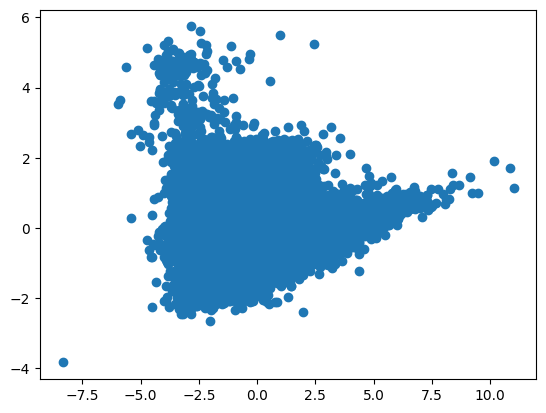

In [44]:
plt.scatter(x, y)


### A 3d interactive scatter plot
Note: The 3d scatter plot would not be INTERACTIVE on github. You'll have to run this notebook on your pc to see the interactive 3d scatter plot.

In [44]:
# import plotly.express as px
# import pandas as pd

train_pca = train_trans_3

# Creating a DataFrame with the PCA-transformed data and labels
df = pd.DataFrame(data=train_pca, columns=['PC1', 'PC2', 'PC3'])
df['Label'] = train_labels
df['Label'] = df['Label'].replace({0: 'Quasar', 1: 'Galaxy', 2: 'Star'})

# Creating an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='Label', labels={'Label': 'Class'}, color_discrete_map={'Quasar': 'red', 'Galaxy': 'green', 'Star': 'blue'})
fig.update_traces(marker=dict(size=5))
fig.update_layout(scene=dict(zaxis=dict(range=[0, max(df['PC3'])])), title='Interactive 3D PCA Plot')
fig.show()


![Image Alt Text](3d-scatter-plot.png)


#### Observations:
- 97.8% of the variance in the original data is explained by the three PCA axes. And since we have three almost distinct groups in the data, corresponding to three classes, so, we can safely assume that photometric measurements are good-enough for classifying these three classes. How accurately we can classify them? We'll see later.
  
- The mixing of data points is not large. **More than 80% of data belongs to three distinct groups**. So, we should be able to get an accuracy of atleast more than 80% using some classification algorithm. So, this is our **baseline accuracy**.


# Gaussian Mixture Model (GMM) - An Unsupervised Learning Approach
Note we have not used Kmeans clustering algorithm as it does not produces the probabilities corresponding to each cluster for each data-point.
It rather produces hard labels.
The probabilities will be helpful for us when we'll create an ensemble of different models. At that time this model will be able to provide us with a different point-of-view of the data


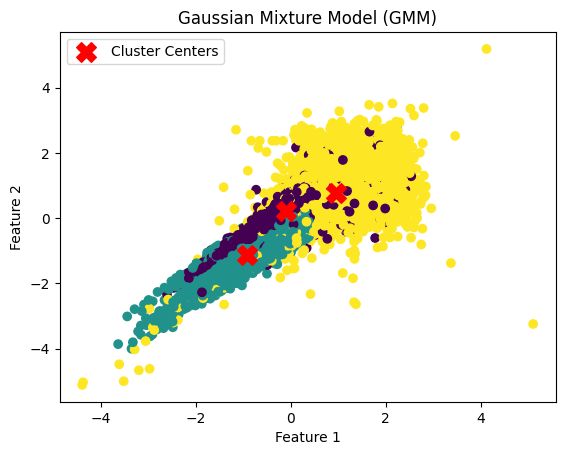

In [45]:
#from sklearn.mixture import GaussianMixture

X = train_np

gmm = GaussianMixture(n_components= 3)
gmm.fit(X)
new_points       =  train_np
labels_gmm_train =  gmm.predict(new_points)
cluster_centers  =  gmm.means_

# Visualize the data and clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm_train)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model (GMM)')
plt.legend()
plt.show()


In [46]:
# This will generate permutations of 0, 1, 2 e.g: 1, 0, 2 OR 2, 0, 1
# it'll then replace the values of 0, 1, 2 by the corresponding values 1, 0, 2 respectively, according to the current permutation

# We have to do that because although the algorithm has classified the data into clusters, but we don't know if the new labels new(0, 1, 2) correspond to our old(0, 1, 2)
# So, we replace the new(0, 1, 2) with all of the permutations of 0, 1, 2.
# Then one of the new permutation corresponds to our old(0, 1, 2)
# We identify this permutation by comparing all of the permutations with the original_labels and the permutation with the highest accuracy is the
# correct permutation

result_dict = hp.generate_permutation_dict(labels_gmm_train)


In [47]:
# Printing the results corresponding to all permutations
for key, value in result_dict.items():
    accuracy = np.sum(value == train_labels) / train_np.shape[0]
    print(f'Accuracy for {key}: {accuracy}')


Accuracy for Permutation_1: (0, 1, 2): 0.5035161744022504
Accuracy for Permutation_2: (0, 2, 1): 0.7235114861697141
Accuracy for Permutation_3: (1, 0, 2): 0.11257618377871542
Accuracy for Permutation_4: (1, 2, 0): 0.23628691983122363
Accuracy for Permutation_5: (2, 0, 1): 0.26019690576652604
Accuracy for Permutation_6: (2, 1, 0): 0.16391233005157055


#### Right away we see that the permutation_2 is the correct permutation


In [53]:
gmm_test_probs  = gmm.predict_proba(test_np)
gmm_valid_probs = gmm.predict_proba(valid_np)

gmm_test_preds  = gmm.predict(test_np)
gmm_valid_preds = gmm.predict(valid_np)


In [54]:
temp = gmm_valid_probs

gmm_valid_probs[:,0] = temp[:,0]
gmm_valid_probs[:,1] = temp[:,2]
gmm_valid_probs[:,2] = temp[:,1]


In [55]:
temp = gmm_test_probs

gmm_test_probs[:,0] = temp[:,0]
gmm_test_probs[:,1] = temp[:,2]
gmm_test_probs[:,2] = temp[:,1]


In [52]:
# gmm_valid_probs = np.argmax(gmm_valid_probs, axis = 1)
# np.sum(gmm_valid_probs == valid_labels)/100


69.4

The predictions of this clustering algorithm on the validation data were correct 69.4% times.


# Neural Network Model - Supervised Learning Approach

In [60]:
!mkdir my_log_dir


### Defining the Architecture & Compiling the Model


In [61]:
input_shape = (6,)

input_layer = Input(shape=input_shape)
x = Dense(32, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
x = Dense(12, activation='relu')(x)
output_layer = Dense(3, activation='softmax')(x)
NN_model = Model(inputs=input_layer, outputs=output_layer)


optimizer = optimizers.Adam(learning_rate=0.01)
NN_model.compile(optimizer =  optimizer,
              loss      =  'sparse_categorical_crossentropy',
              metrics   =  ['accuracy'])

# Display a summary of the model architecture
NN_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 12)                780       
                                                                 
 dense_7 (Dense)             (None, 3)                 39        
                                                                 
Total params: 3,155
Trainable params: 3,155
Non-trainable params: 0
_________________________________________________________________


### Setting Up callbacks

In [62]:
#from tensorflow.keras import callbacks

callbacks_list = [
                    callbacks.EarlyStopping(
                        monitor   = 'val_accuracy',    # Available metrics are: loss, accuracy, val_loss, val_accuracy
                        patience  = 5,                 # if the val_accuracy does not increase for 5 epochs, it'll automatically stop the training 
                        ),
    
                    callbacks.ModelCheckpoint(
                        filepath       =  'NN_model.h5',
                        monitor        =  'val_loss',
                        save_best_only =  True,        # only the set of weights with minimum val_loss will be saved
                    ),
                    callbacks.ReduceLROnPlateau(
                        monitor   =  'val_loss',
                        factor    =  0.8,
                        patience  =  5,
                    ),
                    callbacks.TensorBoard(
                        log_dir          = 'my_log_dir',
                        histogram_freq   =  1,
                    )
                 ]


### Training the Model


In [63]:
history = NN_model.fit(
    train_np, train_labels,
    epochs          = 30,
    batch_size      = 600,
    validation_data = (valid_np, valid_labels),
    callbacks       = callbacks_list
)


Epoch 1/30
57/57 [==============================] - 3s 13ms/step - loss: 0.3835 - accuracy: 0.8566 - val_loss: 0.2406 - val_accuracy: 0.9110 - lr: 0.0100
Epoch 2/30
57/57 [==============================] - 0s 8ms/step - loss: 0.1794 - accuracy: 0.9407 - val_loss: 0.1698 - val_accuracy: 0.9487 - lr: 0.0100
Epoch 3/30
57/57 [==============================] - 0s 8ms/step - loss: 0.1531 - accuracy: 0.9509 - val_loss: 0.1448 - val_accuracy: 0.9531 - lr: 0.0100
Epoch 4/30
57/57 [==============================] - 0s 7ms/step - loss: 0.1483 - accuracy: 0.9510 - val_loss: 0.1494 - val_accuracy: 0.9581 - lr: 0.0100
Epoch 5/30
57/57 [==============================] - 0s 8ms/step - loss: 0.1323 - accuracy: 0.9587 - val_loss: 0.1330 - val_accuracy: 0.9623 - lr: 0.0100
Epoch 6/30
57/57 [==============================] - 0s 6ms/step - loss: 0.1468 - accuracy: 0.9515 - val_loss: 0.1541 - val_accuracy: 0.9468 - lr: 0.0100
Epoch 7/30
57/57 [==============================] - 0s 6ms/step - loss: 0.1286 - 

In [86]:
!tensorboard --logdir=my_log_dir


^C


[click here to see LIVE tensorboard](http://localhost:6006/)


### Plotting

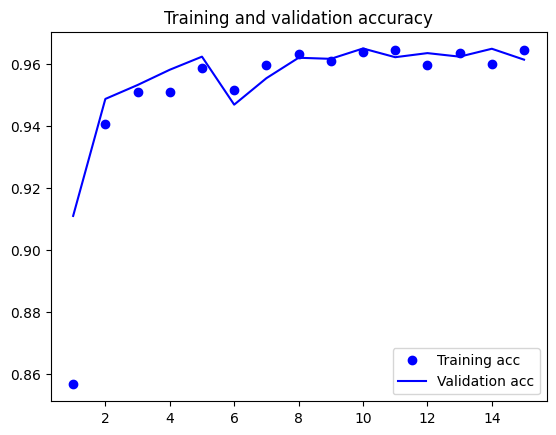

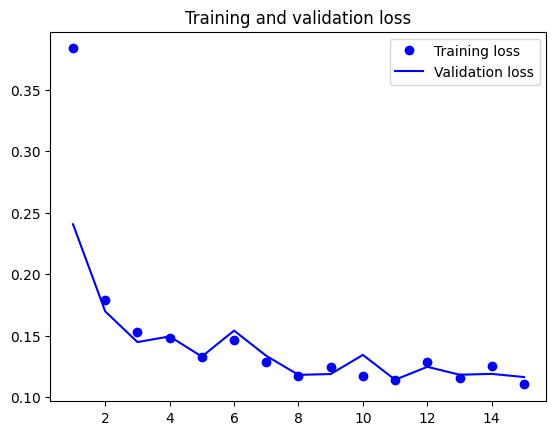

In [64]:
hp.plot_training_history(history)


Since the accuracy and loss curves on validation and test data are closely following each other, therefore we can safely assume that the model has generalized well i.e. it'll most probably give the same accuracy on the test data as well.

### Neural Network Classification Report and Confusion Matrix on Validation Data


356/356 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3792
           1       0.96      0.93      0.94      3792
           2       0.97      1.00      0.98      3792

    accuracy                           0.96     11376
   macro avg       0.96      0.96      0.96     11376
weighted avg       0.96      0.96      0.96     11376



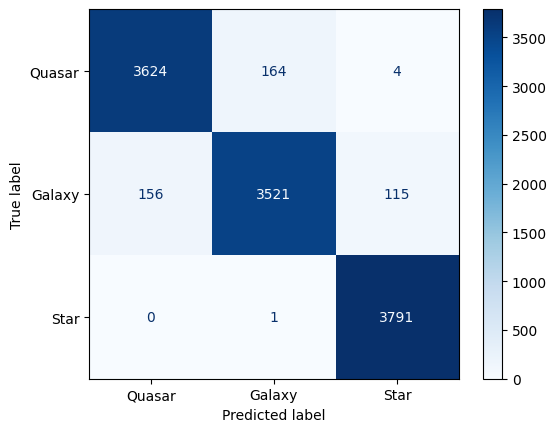

In [65]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

NN_valid_probs        =  NN_model.predict(valid_np)
NN_valid_labels  =  np.argmax(NN_valid_probs, axis=1)

# Generating the classification report
report      = classification_report(valid_labels, NN_valid_labels)
print(report)

# Generating and displaying the confusion_matrix
conf_matrix = confusion_matrix(valid_labels, NN_valid_labels)
disp        = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Quasar', 'Galaxy', 'Star'])
disp.plot(cmap='Blues')


### Neural Network Classification Report and Confusion Matrix on Test Data


356/356 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3793
           1       0.95      0.93      0.94      3793
           2       0.96      1.00      0.98      3793

    accuracy                           0.96     11379
   macro avg       0.96      0.96      0.96     11379
weighted avg       0.96      0.96      0.96     11379

356/356 [==============================] - 1s 2ms/step


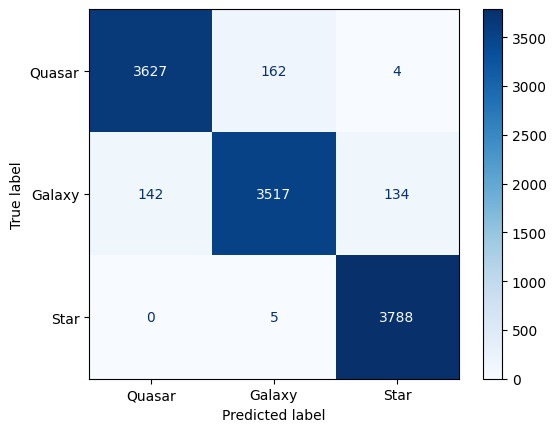

In [66]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

NN_test_probs        =  NN_model.predict(test_np)
NN_predicted_labels  =  np.argmax(NN_test_probs, axis=1)

# Generating the classification report
report      = classification_report(test_labels, NN_predicted_labels)
print(report)

# Generating and displaying the confusion_matrix
conf_matrix = confusion_matrix(test_labels, NN_predicted_labels)
disp        = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Quasar', 'Galaxy', 'Star'])
disp.plot(cmap='Blues')

NN_valid_probs        =  NN_model.predict(valid_np)


We see that the neural network is performing well on the test data as well. So, we were right when we said that most probably the model has generalized well.

In [67]:
NN_test_probs  = NN_model.predict(test_np)
NN_valid_probs = NN_model.predict(valid_np)

NN_test_preds  = np.argmax(NN_test_probs,  axis = 1)
NN_valid_preds = np.argmax(NN_valid_probs, axis = 1)


356/356 [==============================] - 1s 2ms/step


# XGBoost Model - Supervised Learning Approach

In [68]:
# from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(train_np, train_labels)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### XGBoost Classification Report and Confusion Matrix on Validation Data


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3792
           1       0.95      0.97      0.96      3792
           2       1.00      1.00      1.00      3792

    accuracy                           0.97     11376
   macro avg       0.97      0.97      0.97     11376
weighted avg       0.97      0.97      0.97     11376



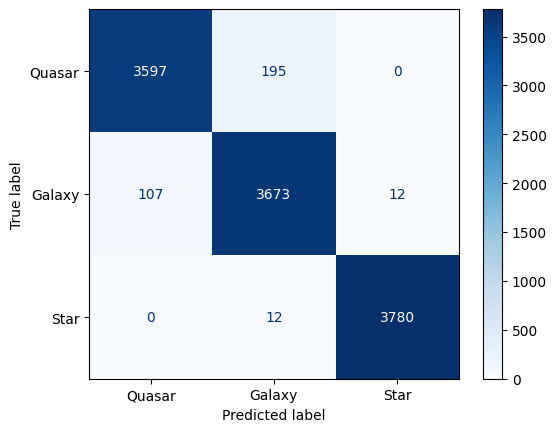

In [69]:
XGB_valid_pred = XGB_model.predict(valid_np)

# Generating the classification report
report = classification_report(valid_labels, XGB_valid_pred)
print(report)

conf_matrix = confusion_matrix(valid_labels, XGB_valid_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Quasar', 'Galaxy', 'Star'])
disp.plot(cmap='Blues')


###  XGBoost Classification Report and Confusion Matrix on Test Data


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3793
           1       0.95      0.97      0.96      3793
           2       1.00      1.00      1.00      3793

    accuracy                           0.97     11379
   macro avg       0.97      0.97      0.97     11379
weighted avg       0.97      0.97      0.97     11379



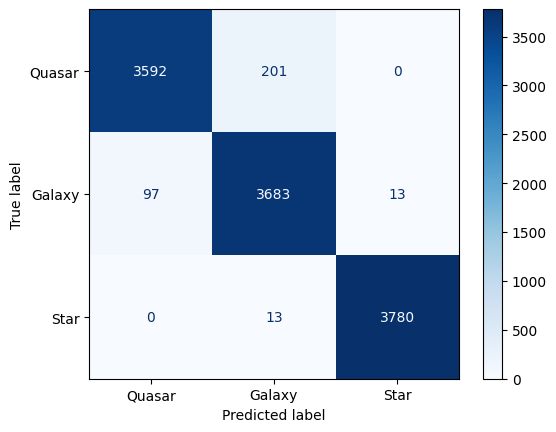

In [70]:
XGB_test_pred = XGB_model.predict(test_np)

# Generating the classification report
report = classification_report(test_labels, XGB_test_pred)
print(report)

conf_matrix = confusion_matrix(test_labels, XGB_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Quasar', 'Galaxy', 'Star'])
disp.plot(cmap='Blues')


In [71]:
XGB_test_probs  = XGB_model.predict_proba(test_np)
XGB_valid_probs = XGB_model.predict_proba(valid_np)

XGB_test_preds  = XGB_model.predict(test_np)
XGB_valid_preds = XGB_model.predict(valid_np)


# Random Forest - Supervised Learning Approach

In [72]:
#from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(train_np, train_labels)


RandomForestClassifier()

In [73]:
RF_model.score(valid_np, valid_labels)


0.9735407876230661

In [74]:
RF_model.score(test_np, test_labels)


0.9738992881624045

###  Random Forest Classification Report and Confusion Matrix on Validation Data


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3792
           1       0.95      0.97      0.96      3792
           2       1.00      1.00      1.00      3792

    accuracy                           0.97     11376
   macro avg       0.97      0.97      0.97     11376
weighted avg       0.97      0.97      0.97     11376



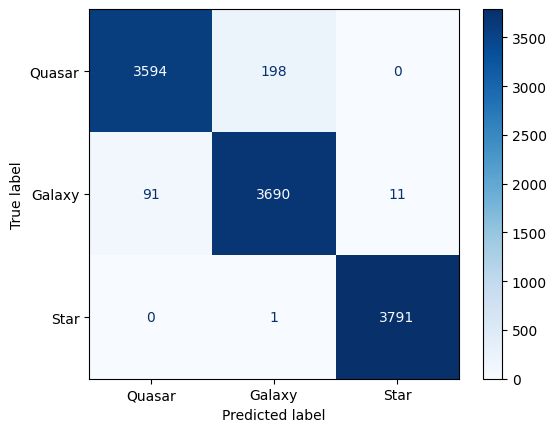

In [75]:
RF_valid_pred = RF_model.predict(valid_np)

# Generating the classification report
report = classification_report(valid_labels, RF_valid_pred)
print(report)

conf_matrix = confusion_matrix(valid_labels, RF_valid_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Quasar', 'Galaxy', 'Star'])
disp.plot(cmap='Blues')


###  Random Forest Classification Report and Confusion Matrix on Test Data


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3793
           1       0.95      0.97      0.96      3793
           2       1.00      1.00      1.00      3793

    accuracy                           0.97     11379
   macro avg       0.97      0.97      0.97     11379
weighted avg       0.97      0.97      0.97     11379



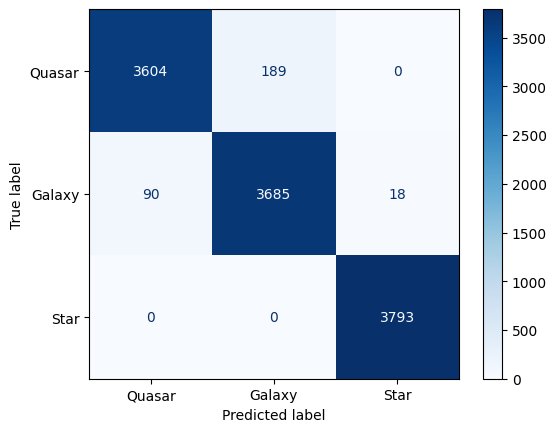

In [76]:
RF_test_pred = RF_model.predict(test_np)

# Generating the classification report
report = classification_report(test_labels, RF_test_pred)
print(report)

conf_matrix = confusion_matrix(test_labels, RF_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Quasar', 'Galaxy', 'Star'])
disp.plot(cmap='Blues')


So far, on the test data Random Forest has produced the best Results!

In [77]:
RF_test_probs  = RF_model.predict_proba(test_np)
RF_valid_probs = RF_model.predict_proba(valid_np)

RF_test_preds  = RF_model.predict(test_np)
RF_valid_preds = RF_model.predict(valid_np)


# Model Ensembling

Ensembling relies on the assumption that different good models trained independently are likely to be good for different reasons: each model looks at slightly different aspects of the data to make its predictions, getting part of the “truth” but not all of
it. You may be familiar with the ancient parable of the blind men and the elephant: a
group of blind men come across an elephant for the first time and try to understand
what the elephant is by touching it. Each man touches a different part of the elephant’s body—just one part, such as the trunk or a leg. Then the men describe to
each other what an elephant is: “It’s like a snake,” “Like a pillar or a tree,” and so on.
The blind men are essentially machine-learning models trying to understand the manifold of the training data, each from its own perspective, using its own assumptions
(provided by the unique architecture of the model and the unique random weight initialization). Each of them gets part of the truth of the data, but not the whole truth. By
pooling their perspectives together, you can get a far more accurate description of the
data. The elephant is a combination of parts: not any single blind man gets it quite
right, but, interviewed together, they can tell a fairly accurate story.

- Deep Learning with Python - **FRANÇOIS CHOLLET**


### Setting up a baseline accuracy using validation data

0.972134317862166
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3792
           1       0.95      0.97      0.96      3792
           2       0.99      1.00      1.00      3792

    accuracy                           0.97     11376
   macro avg       0.97      0.97      0.97     11376
weighted avg       0.97      0.97      0.97     11376



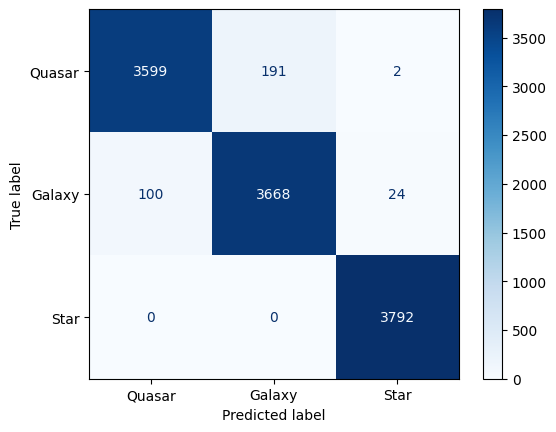

In [78]:
gmm_weight  = 1; NN_weight   = 1; XGB_weight  = 1; RF_weight   = 1

final_probs             =  (gmm_weight*gmm_valid_probs  +  NN_weight*NN_valid_probs  +  XGB_weight*XGB_valid_probs  +  RF_weight*RF_valid_probs )/4
final_predicted_labels  =  np.argmax(final_probs, axis=1)

print(np.sum(final_predicted_labels == valid_labels)/len(valid_labels))

report = classification_report(valid_labels, final_predicted_labels)
print(report)

#conf_matrix = confusion_matrix(valid_labels, modes)
conf_matrix = confusion_matrix(valid_labels, final_predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Quasar', 'Galaxy', 'Star'])
disp.plot(cmap='Blues')


0.9713507338078917
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3793
           1       0.95      0.97      0.96      3793
           2       0.99      1.00      1.00      3793

    accuracy                           0.97     11379
   macro avg       0.97      0.97      0.97     11379
weighted avg       0.97      0.97      0.97     11379



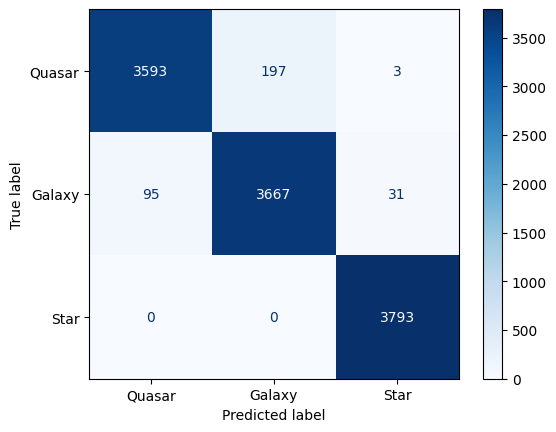

In [79]:
gmm_weight  = 1; NN_weight   = 1; XGB_weight  = 1; RF_weight   = 1

final_probs             =  (gmm_weight*gmm_test_probs  +  NN_weight*NN_test_probs  +  XGB_weight*XGB_test_probs  +  RF_weight*RF_test_probs )/4
final_predicted_labels  =  np.argmax(final_probs, axis=1)

print(np.sum(final_predicted_labels == test_labels)/len(test_labels))

report = classification_report(test_labels, final_predicted_labels)
print(report)

#conf_matrix = confusion_matrix(valid_labels, modes)
conf_matrix = confusion_matrix(test_labels, final_predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Quasar', 'Galaxy', 'Star'])
disp.plot(cmap='Blues')


###  Model Ensembling Classification Report and Confusion Matrix on Validation Data


In [81]:
true_labels       = valid_labels
model_predictions = [gmm_valid_probs, NN_valid_probs, XGB_valid_probs, RF_valid_probs]

best_weights, best_accuracy = hp.optimize_weights_with_random_search(true_labels, model_predictions, 10000)

print("Best Weights:",  best_weights)
print("Best Accuracy:", best_accuracy)


Best Weights: [0.17027385 0.09905563 0.25974601 0.47092451]
Best Accuracy: 0.9744198312236287


The accuracy on validation data went up from **0.9721 to 0.9744** !

0.9744198312236287
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3792
           1       0.95      0.97      0.96      3792
           2       1.00      1.00      1.00      3792

    accuracy                           0.97     11376
   macro avg       0.97      0.97      0.97     11376
weighted avg       0.97      0.97      0.97     11376



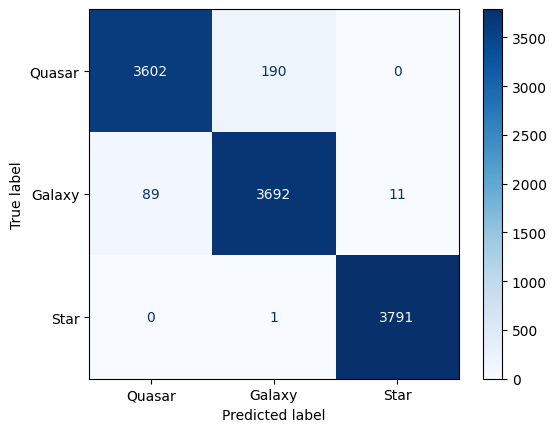

In [82]:
gmm_weight  = best_weights[0]; NN_weight   = best_weights[1]; XGB_weight  = best_weights[2]; RF_weight   = best_weights[3]

final_probs             =  (gmm_weight*gmm_valid_probs  +  NN_weight*NN_valid_probs  +  XGB_weight*XGB_valid_probs  +  RF_weight*RF_valid_probs )/4
final_predicted_labels  =  np.argmax(final_probs, axis=1)

print(np.sum(final_predicted_labels == valid_labels)/len(valid_labels))

report = classification_report(valid_labels, final_predicted_labels)
print(report)

#conf_matrix = confusion_matrix(valid_labels, modes)
conf_matrix = confusion_matrix(valid_labels, final_predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Quasar', 'Galaxy', 'Star'])
disp.plot(cmap='Blues')


All of the scores have been increased!

###  Model Ensembling Classification Report and Confusion Matrix on Test Data


0.9744265752702347
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3793
           1       0.95      0.97      0.96      3793
           2       1.00      1.00      1.00      3793

    accuracy                           0.97     11379
   macro avg       0.97      0.97      0.97     11379
weighted avg       0.97      0.97      0.97     11379



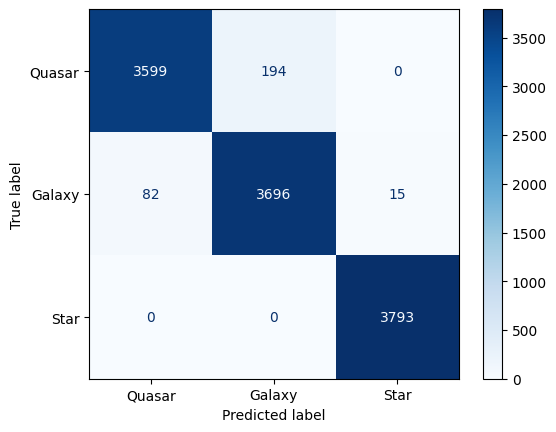

In [83]:
gmm_weight  = best_weights[0]; NN_weight   = best_weights[1]; XGB_weight  = best_weights[2]; RF_weight   = best_weights[3]

final_probs             =  (gmm_weight*gmm_test_probs  +  NN_weight*NN_test_probs  +  XGB_weight*XGB_test_probs  +  RF_weight*RF_test_probs )/4
final_predicted_labels  =  np.argmax(final_probs, axis=1)

print(np.sum(final_predicted_labels == test_labels)/len(test_labels))

report = classification_report(test_labels, final_predicted_labels)
print(report)

#conf_matrix = confusion_matrix(valid_labels, modes)
conf_matrix = confusion_matrix(test_labels, final_predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Quasar', 'Galaxy', 'Star'])
disp.plot(cmap='Blues')


Although the weight optimization was done only on validation data, but here we see an increase in accuracy of even the test data.
The accuracy went from **0.9713 to 0.9744**.


# Summary and Results


We see that although we were getting almost same accuracy scores from the Random Forest model and XGBoost model alone, but still since in model ensembling, we are using multiple models to make predictions, thus we expect model ensembling to be more general!
